# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [3]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

In [4]:
#your turn
df = pd.merge(df_offers, df_transactions)
df.describe()

,offer_id,min_qty,discount,n
count,324.000000,324.000000,324.000000,324.0
mean,17.012346,58.407407,59.481481,1.0
std,9.703332,49.741444,20.327877,0.0
min,1.000000,6.000000,17.000000,1.0
25%,8.000000,6.000000,45.000000,1.0
50%,18.000000,72.000000,56.000000,1.0
75%,26.000000,72.000000,83.000000,1.0
max,32.000000,144.000000,89.000000,1.0


In [5]:
matrix = df.pivot_table(index=['customer_name'], columns=['offer_id'], values='n')
matrix = matrix.fillna(0).reset_index()
matrix.head()

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 


<li> What values of inertia do you believe represent better clusterings? Why?

#### Lower inertia (sum-of-squares error SS) represents better clustering. Lower inertia means tighter clusters, thus clearer grouping. 


<li> What challenges did you experience using the Elbow method to pick K?

#### The inertia VS k plot below gives an elbow at 3. While the inertia continues to decrease while k increase, the largest rate of change happens before k=3. 

In [6]:
matrix = df.pivot_table(index=['customer_name'], columns=['offer_id'], values='n')
matrix = matrix.fillna(0).reset_index()
matrix.head()

# your turn
x_cols=matrix.columns[1:]
x_cols

from sklearn.cluster import KMeans

#choose the 0/1 columns
X=matrix[matrix.columns[2:]]


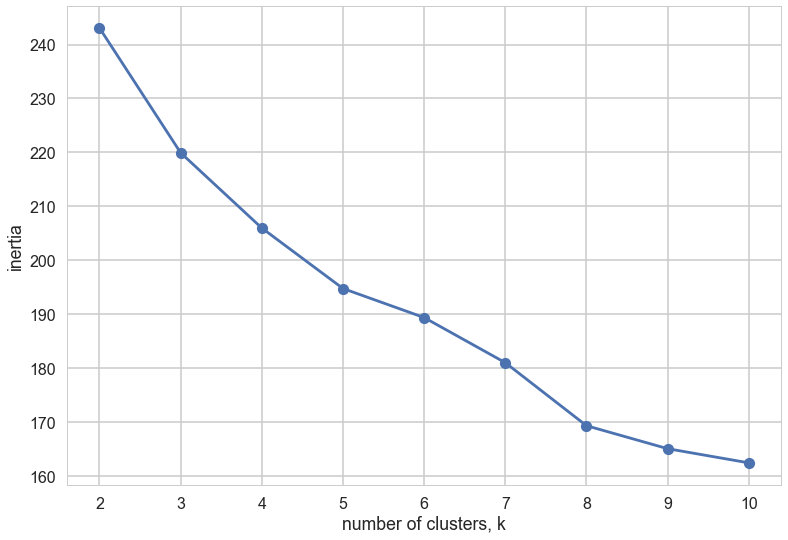

In [7]:
inertia = []
ks=range(2,11)

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
     # Append the inertia to the list of inertias
    inertia.append(model.inertia_)
    
plt.plot(ks, inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

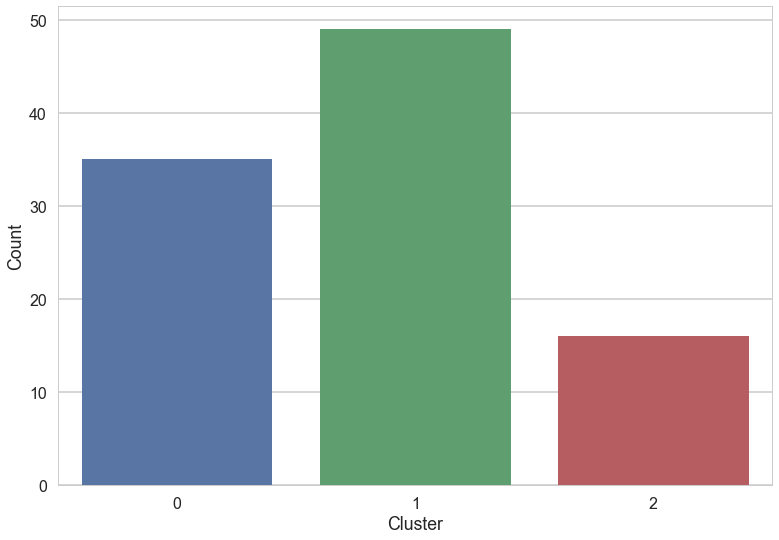

In [8]:
model = KMeans(n_clusters=3)
matrix['cluster'] = model.fit_predict(X)
df_c = matrix.cluster.value_counts().reset_index()
df_c['index']=df_c['index'].astype('category')
sns.barplot(x='index', y='cluster', data= df_c)
plt.xlabel('Cluster')
plt.ylabel('Count')

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.



<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>

#### The plot suggests an elbow also at k=3. It is the same as the results given with the inertia method. 

When looking at the silhouette plot for each clusters at k=3, we see two of the three clusters have a score between 0.25 and 0.5. It indicates weak structures for these two clusters. The third cluster has a below 0.25 score which mean it could be noise. 

Checking the silhouette plot for other number of clusters, we found there are always several clusters not having a well defined structure.


For n_clusters = 2 The average silhouette_score is : 0.0844695316212
For n_clusters = 3 The average silhouette_score is : 0.124356879068
For n_clusters = 4 The average silhouette_score is : 0.135235566276
For n_clusters = 5 The average silhouette_score is : 0.109460436341
For n_clusters = 6 The average silhouette_score is : 0.118099159835
For n_clusters = 7 The average silhouette_score is : 0.121761858012
For n_clusters = 8 The average silhouette_score is : 0.119180015421
For n_clusters = 9 The average silhouette_score is : 0.122664429119


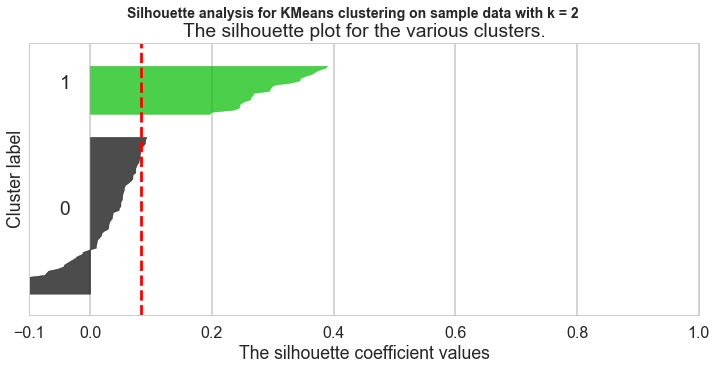

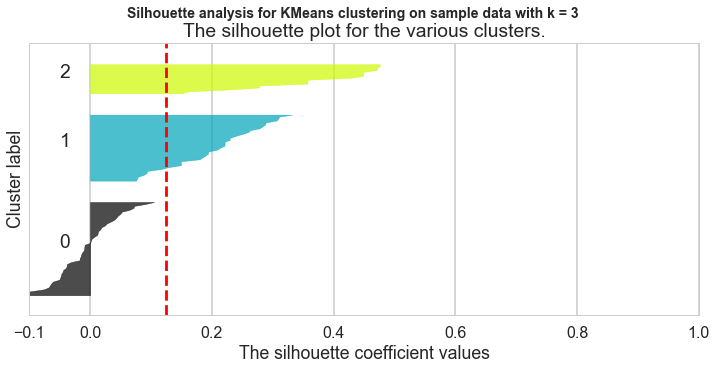

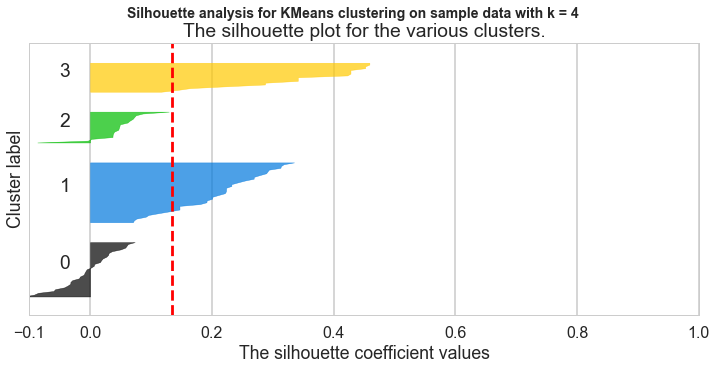

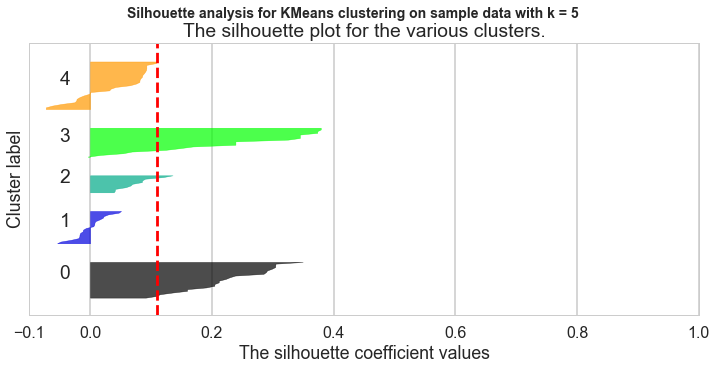

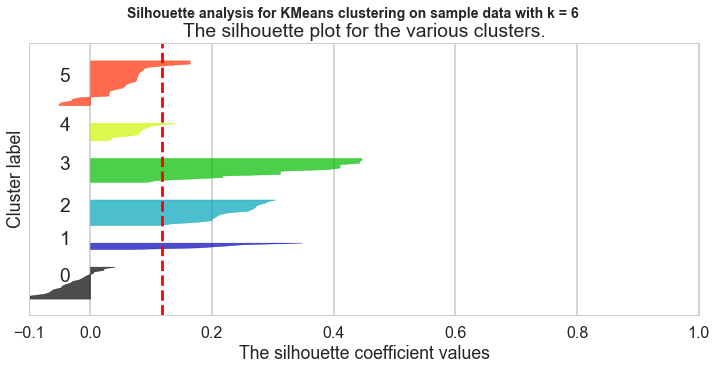

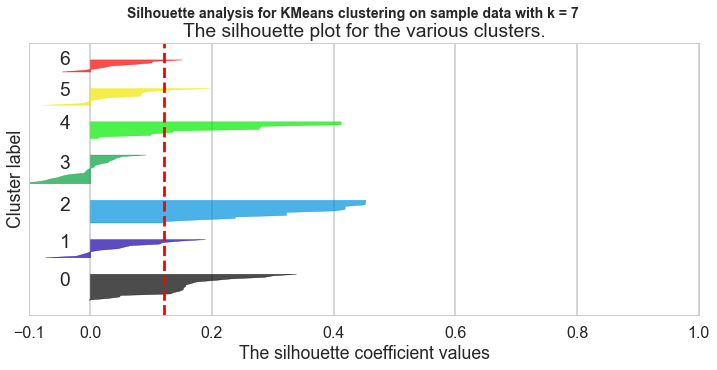

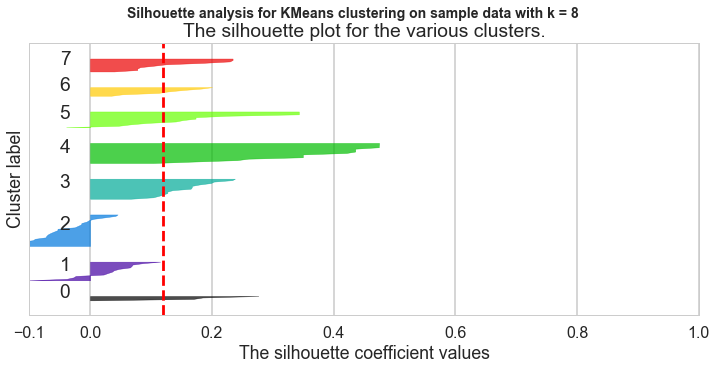

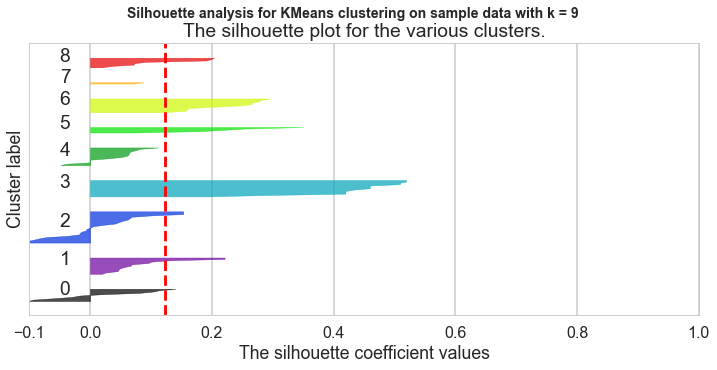

In [24]:
# Your turn.

sil_score = []

from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

for k in range(2,10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(12, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])
    
    model = KMeans(n_clusters=k,random_state=8)
    clster = model.fit_predict(X)
    sscore = silhouette_score(X, clster)
     # Append the inertia to the list of inertias
    sil_score.append(sscore)
    print("For n_clusters =", k,
          "The average silhouette_score is :", sscore)

    sample_silhouette_values = silhouette_samples(X, clster)
    
    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clster == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_score(X,clster), color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with k = %d" % k),
                 fontsize=14, fontweight='bold')
    

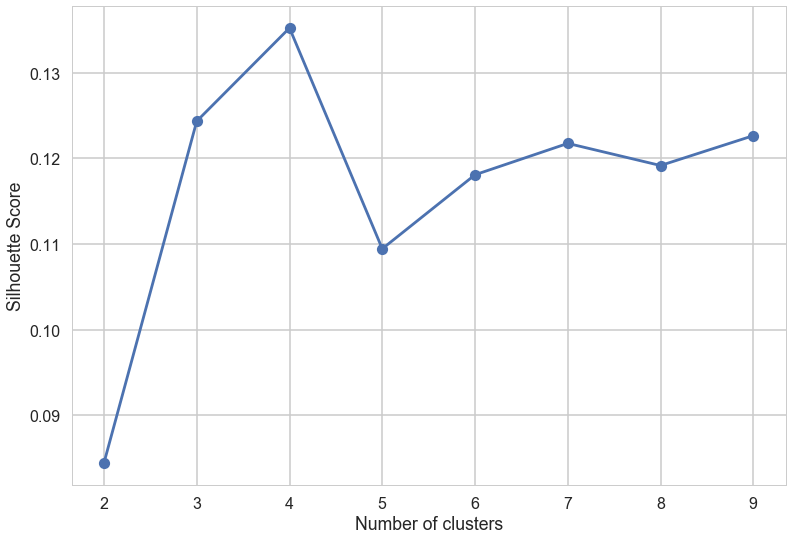

In [22]:
plt.plot(range(2,10), sil_score,'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')


### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

In [25]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(X)

matrix['x'] = pca.fit_transform(X)[:,0]
matrix['y'] = pca.fit_transform(X)[:,1]

customer_clusters = matrix[['customer_name', 'cluster', 'x', 'y']]
customer_clusters.head()


offer_id,customer_name,cluster,x,y
0,Adams,0,1.014908,0.157764
1,Allen,1,-0.313043,0.019268
2,Anderson,2,-0.451462,1.008114
3,Bailey,0,0.700551,0.006002
4,Baker,1,0.072574,-0.494352


/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


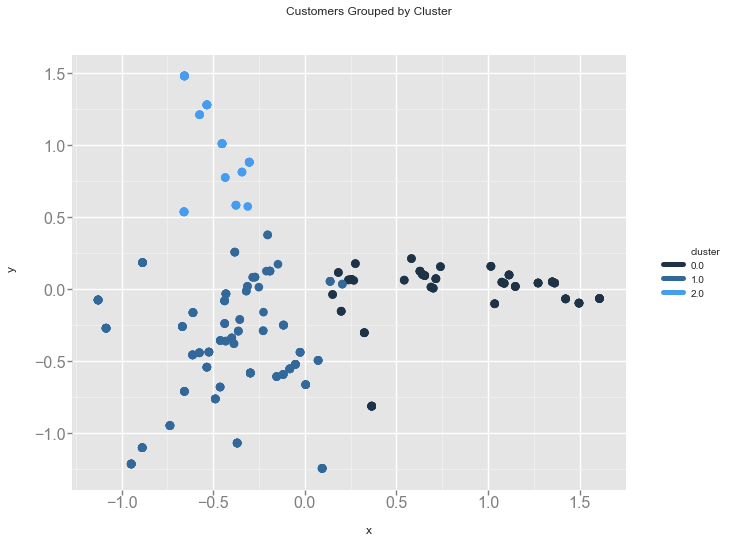

<ggplot: (-9223372036561354247)>

In [26]:
df = pd.merge(df_transactions, customer_clusters)
df = pd.merge(df_offers, df)

from ggplot import *

ggplot(df, aes(x='x', y='y', color='cluster')) + \
    geom_point(size=75) + \
    ggtitle("Customers Grouped by Cluster")


<li> How do the clusters look? 

There are some visually obvious clusters in the plot. But there are also some overlaps between the clusters.  

<li> Based on what you see, what seems to be the best value for K? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?

Three clusters is a good seperation of data points judging from the plot. The PCA method could be used to choose A with the most visual efficiency. The result agrees with the number of clusters from the inertia and silhouette method. 





What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

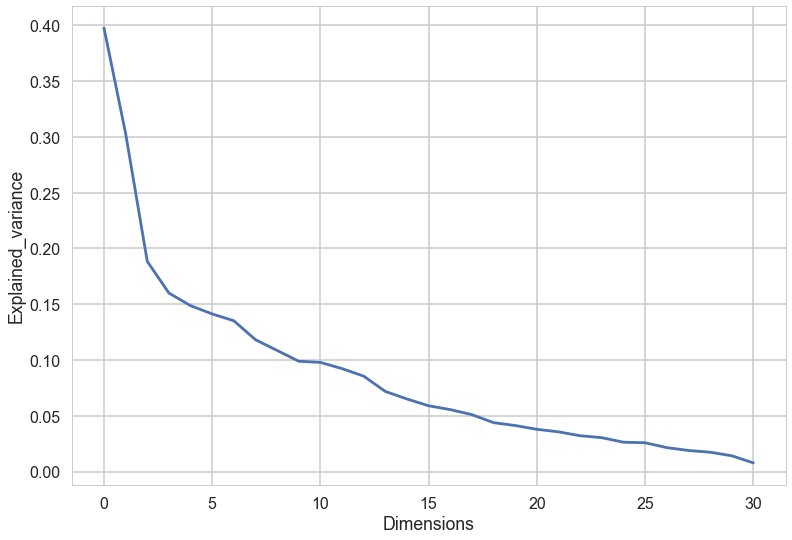

In [12]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(X)

#plot explained variance
plt.plot(pca.explained_variance_)
plt.xlabel('Dimensions')
plt.ylabel('Explained_variance')



<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>

#### The plot shows an elbow at around 2-3 dimensions. Our default pick at 2 previously is valid though it could be interesting to see if there is an change when 3 is chosen. 


Next we take a look at the properties of the labeled data. Looking at if there are meaningful reasons for these wines to be grouped into these catagories. 

There are four clusters established from the KMeans model.

In [31]:
df.groupby("cluster").campaign.value_counts().unstack()

campaign,April,August,December,February,January,July,June,March,May,November,October,September
cluster,,,,,,,,,,,,
0,2.0,3.0,16.0,2.0,NaN,14.0,NaN,34.0,7.0,17.0,1.0,NaN
1,14.0,28.0,27.0,20.0,13.0,5.0,19.0,17.0,16.0,6.0,16.0,4.0
2,1.0,NaN,NaN,NaN,7.0,7.0,1.0,NaN,1.0,NaN,13.0,13.0


In [30]:
df.groupby("cluster").varietal.value_counts().unstack()

varietal,Cabernet Sauvignon,Champagne,Chardonnay,Espumante,Malbec,Merlot,Pinot Grigio,Pinot Noir,Prosecco
cluster,,,,,,,,,
0,1.0,5.0,NaN,32.0,16.0,6.0,16.0,NaN,20.0
1,31.0,75.0,14.0,8.0,15.0,13.0,1.0,7.0,21.0
2,NaN,1.0,1.0,NaN,1.0,1.0,NaN,37.0,2.0


In [29]:
df.groupby("cluster").origin.value_counts().unstack()

origin,Australia,California,Chile,France,Germany,Italy,New Zealand,Oregon,South Africa
cluster,,,,,,,,,
0,17.0,4.0,7.0,34.0,1.0,NaN,1.0,15.0,17.0
1,9.0,10.0,30.0,87.0,8.0,12.0,11.0,11.0,7.0
2,13.0,2.0,NaN,7.0,7.0,12.0,1.0,NaN,1.0


In [27]:
df.groupby("cluster").min_qty.mean()

cluster
0    14.000000
1    79.783784
2    65.581395
Name: min_qty, dtype: float64

In [28]:
df.groupby("cluster").discount.mean()

cluster
0    54.989583
1    63.524324
2    52.116279
Name: discount, dtype: float64

#### There are several things worth mentioning: 
1. Cluster one (0) has a average minimum quantity of 14 while the rest of the clusters has at least 65! 
2. Cluster three (2) contains pinot nior campaigns for the most part. This cluster group also has the highest silhouette score among the three classes. The discount on this group is the lowest with an average of 52. 
3. Most of the Cabernet Sauvignon and Champagne were included in Cluster two (1). It has a higher average discount rate compared with the other two clusters. 

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html


<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>



In [32]:
# Your turn
# Affinity propagation

from sklearn.cluster import AffinityPropagation
apc = AffinityPropagation(damping=0.5)

cluster_apc = apc.fit_predict(X)
sil_score_apc = silhouette_score(X,cluster_apc)

print('The average silhouette score for affinity propagation method is: ', sil_score_apc)


The average silhouette score for affinity propagation method is:  0.127675879864


In [33]:
# Your turn
# Spectral clustering

from sklearn.cluster import SpectralClustering

scc = SpectralClustering(n_clusters=3)

cluster_scc = scc.fit_predict(X)
sil_score_scc = silhouette_score(X,cluster_scc)

print('The average silhouette score for spectral clustering method is: ', sil_score_scc)



The average silhouette score for spectral clustering method is:  0.10495639298


In [34]:
# Your turn
# Agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

acc = AgglomerativeClustering(n_clusters=3)

cluster_acc = acc.fit_predict(X)
sil_score_acc = silhouette_score(X,cluster_acc)

print('The average silhouette score for agglomerative clustering method is: ', sil_score_acc)

The average silhouette score for agglomerative clustering method is:  0.118603678939


In [35]:
# Your turn
# DBSCAN

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(labels)
print(n_clusters_)

[-1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  2 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
3


-1 means the data gives mostly noise for clustering. 

Judging from the silhoutte score, some of these unsupervised models could compare with the KMeans and some gives worse results. Affinity propagation is doing better than the rest presented here. DBSCAN on the other hand, was not able to find clusters from our data but only noise. (why?) 